In [1]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
EVAL_DIR = "../results/evaluate"

eval_files = sorted(glob.glob(f"{EVAL_DIR}/*.json"))

assert len(eval_files) > 0, " Không tìm thấy file eval nào trong results/evaluate"

records = []

for path in eval_files:
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
        data["source_file"] = path.split("/")[-1]  # lưu tên file cho trace
        records.append(data)

df = pd.DataFrame(records)
df = df.sort_values("num_users_evaluated").reset_index(drop=True)

df


,Precision@10,Recall@10,F1@10,HitRate@10,UserCoverage,num_users_evaluated,source_file
0,0.0900,0.082374,0.081522,0.60,1.0,10,evaluate\eval_k10_20260126_110307.json
1,0.0800,0.086760,0.073854,0.54,1.0,100,evaluate\eval_k10_20260125_201740.json
2,0.0688,0.064095,0.058776,0.42,1.0,1000,evaluate\eval_k10_20260125_003325.json


In [3]:
summary_cols = [
    "num_users_evaluated",
    "Precision@10",
    "Recall@10",
    "F1@10",
    "HitRate@10",
    "UserCoverage",
]

df[summary_cols]


,num_users_evaluated,Precision@10,Recall@10,F1@10,HitRate@10,UserCoverage
0,10,0.0900,0.082374,0.081522,0.60,1.0
1,100,0.0800,0.086760,0.073854,0.54,1.0
2,1000,0.0688,0.064095,0.058776,0.42,1.0


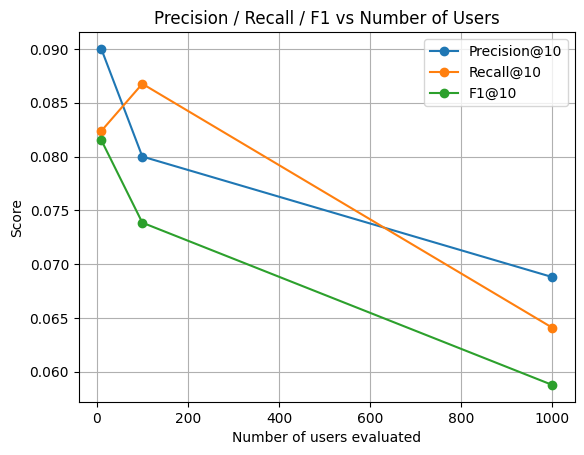

In [4]:
plt.figure()
plt.plot(df["num_users_evaluated"], df["Precision@10"], marker="o", label="Precision@10")
plt.plot(df["num_users_evaluated"], df["Recall@10"], marker="o", label="Recall@10")
plt.plot(df["num_users_evaluated"], df["F1@10"], marker="o", label="F1@10")

plt.xlabel("Number of users evaluated")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 vs Number of Users")
plt.legend()
plt.grid(True)
plt.show()


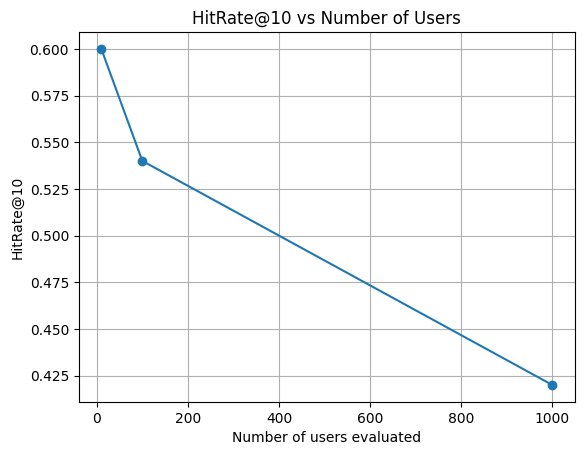

In [5]:
plt.figure()
plt.plot(df["num_users_evaluated"], df["HitRate@10"], marker="o")

plt.xlabel("Number of users evaluated")
plt.ylabel("HitRate@10")
plt.title("HitRate@10 vs Number of Users")
plt.grid(True)
plt.show()


In [6]:
stability = (
    df
    .set_index("num_users_evaluated")[["Precision@10", "Recall@10", "F1@10", "HitRate@10"]]
    .pct_change()
    .abs()
)

stability


,Precision@10,Recall@10,F1@10,HitRate@10
num_users_evaluated,,,,
10,NaN,NaN,NaN,NaN
100,0.111111,0.053240,0.094068,0.100000
1000,0.140000,0.261234,0.204161,0.222222


In [7]:
final_eval = df.iloc[-1]
final_eval


Precision@10                                           0.0688
Recall@10                                            0.064095
F1@10                                                0.058776
HitRate@10                                               0.42
UserCoverage                                              1.0
num_users_evaluated                                      1000
source_file            evaluate\eval_k10_20260125_003325.json
Name: 2, dtype: object

In [8]:
final_eval["num_users_evaluated"]


np.int64(1000)